<a href="https://colab.research.google.com/github/17520755/CS114.M11/blob/main/BT_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LAB 1: Linear Regression




17520755	Nguyễn Duy Minh	

17520949	Phạm Văn Hào Quang

19522127	Trương Tấn Sang	

In [ ]:
%%capture
!wget https://cs.uit.edu.vn/data2.txt
!wget https://cs.uit.edu.vn/data3.txt
!wget https://cs.uit.edu.vn/data4.txt


data preprocessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
train = pd.read_csv('data2.txt', header=None).to_numpy()
test_1 = pd.read_csv('data3.txt', header=None).to_numpy()
test_2 = pd.read_csv('data4.txt', header=None).to_numpy()


train = train[train[:, 0] > 0.4*1e7] 

scaler = StandardScaler()

X_train, y_train = scaler.fit_transform(train[:, :1]), train[:, 1:]
X_test_1, y_test_1 = scaler.transform(test_1[:, :1]), test_1[:, 1:]
X_test_2, y_test_2 = scaler.transform(test_2[:, :1]), test_2[:, 1:]

In [ ]:
mean, std = scaler.mean_, scaler.var_
mean, std

(array([6998697.90461005]), array([2.97249112e+12]))

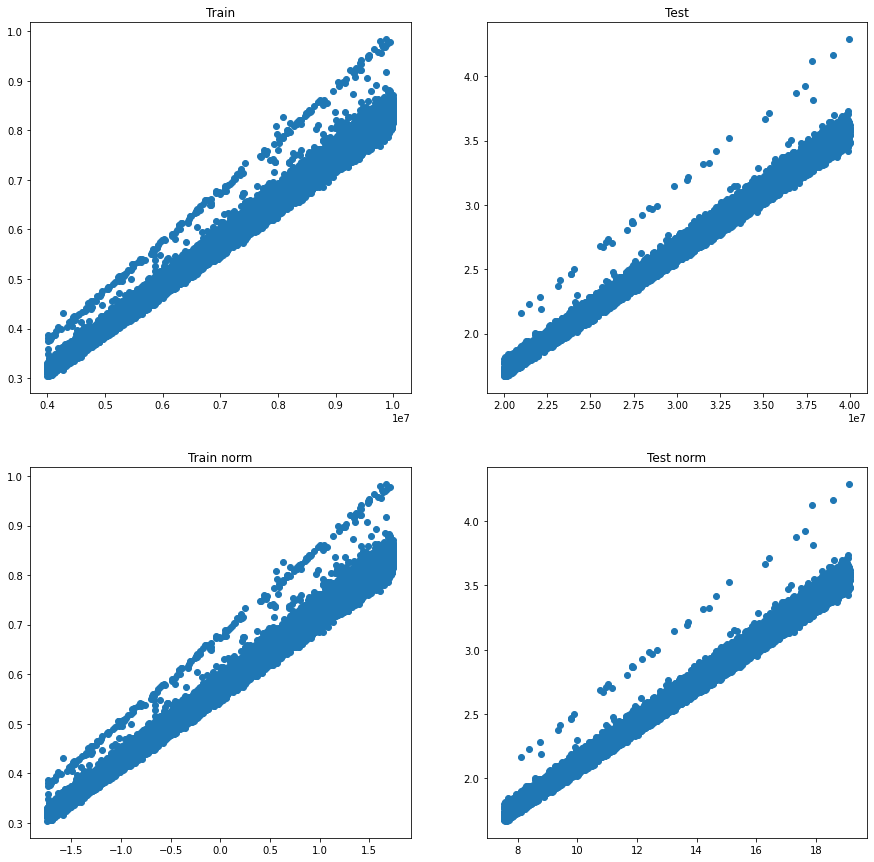

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax[0][0].scatter(train[:, :1], train[:, 1:])
ax[0][0].set_title('Train')
ax[0][1].scatter(test_1[:, :1], test_1[:, 1:])
ax[0][1].set_title('Test')
ax[1][0].scatter(X_train, y_train)
ax[1][0].set_title('Train norm')
ax[1][1].scatter(X_test_1, y_test_1)
ax[1][1].set_title('Test norm')
plt.show()

In [ ]:
train.shape, test_1.shape

((42646, 2), (10590, 2))

Linear Regression


In [ ]:
def linear_regression(X, w):
    return np.dot(X, w)
    

In [ ]:
def mse(y_hat, y):
    m = len(y)
    return np.mean((y_hat - y)**2)/2

In [ ]:
def r2_score(y, pred):
    ssr = ((y-pred)**2).sum()
    sst = ((y - y.mean())**2).sum()
    return 1 - (ssr/sst)

In [ ]:
def training(x, y, lr):
    m = len(x)
    x = np.c_[x, np.ones((m, 1))]
    w = np.random.normal(size=(x.shape[1], 1))
    eps = 0.00001
    losses = []
    idx = 0
    while True:
        idx +=1
        y_hat = linear_regression(x, w)
        loss = mse(y_hat, y)
        losses.append(loss)
        if idx > 5 and abs(losses[-1] - losses[-5]) < eps:
            break
        grad = (1/m)*(np.dot(x.T, (y_hat - y)))
        w -= lr*grad

    return losses, w

In [ ]:
def predict(X, w):
    m = len(X)
    X = np.c_[X, np.ones((m, 1))]
    return np.dot(X, w)

In [ ]:
lr = 1e-1
his, w = training(X_train, y_train, lr)

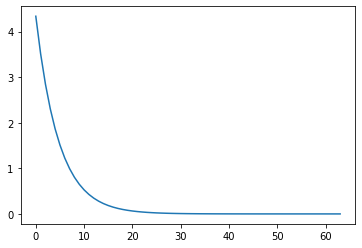

In [ ]:
plt.plot(his)
plt.show()

In [ ]:
def visual_scratch(w, X_train, y_train, X_test, y_test, label='Test'):
    train_pred = predict(X_train, w)
    train_score = r2_score(y_train, train_pred)

    test_pred = predict(X_test, w)
    test_score = r2_score(y_test, test_pred)

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(scaler.inverse_transform(X_train), y_train)
    ax[0].scatter(scaler.inverse_transform(X_train), train_pred, c='r')
    ax[0].set_title('Train Predict - Score: {}'.format(train_score))

    ax[1].scatter(scaler.inverse_transform(X_test), y_test)
    ax[1].scatter(scaler.inverse_transform(X_test), test_pred, c='r')
    ax[1].set_title(label + ' Predict - Score: {}'.format(test_score))
    plt.show()

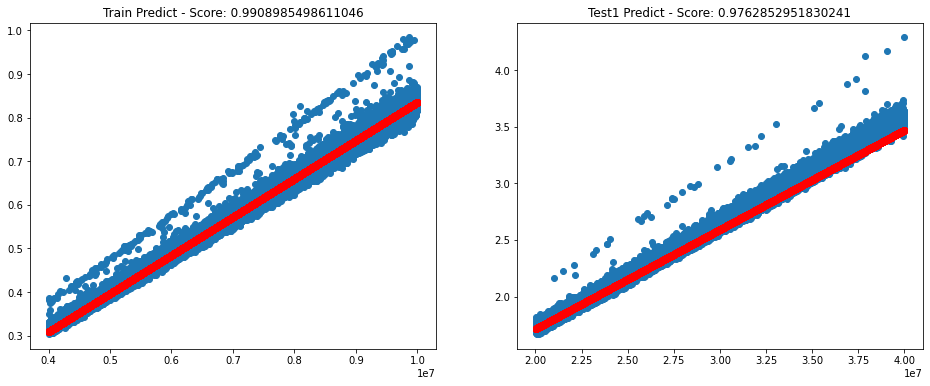

In [ ]:
visual_scratch(w, X_train, y_train, X_test_1, y_test_1, label='Test1')

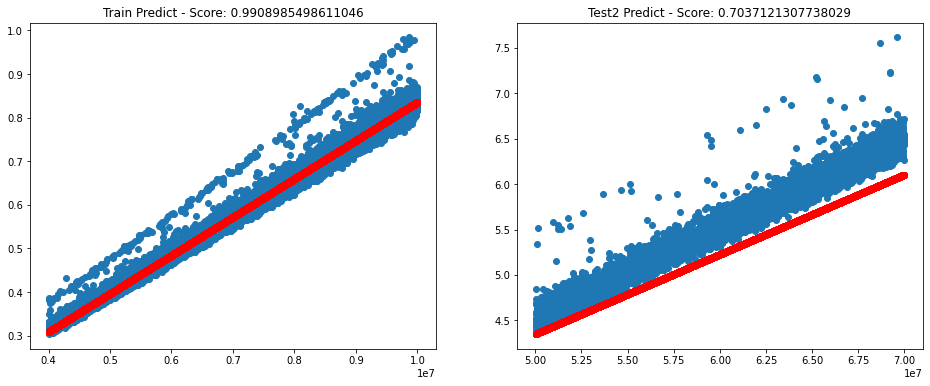

In [ ]:
visual_scratch(w, X_train, y_train, X_test_2, y_test_2, label='Test2')

**Polynomial Regression**

In [ ]:
def polynominal_features(x):
  return np.c_[x[:, :1], np.log(x[:, :1]), x[:, :1]**0.5]

In [ ]:
train = pd.read_csv('data2.txt', header=None).to_numpy()
test1 = pd.read_csv('data3.txt', header=None).to_numpy()
test2 = pd.read_csv('data4.txt', header=None).to_numpy()

train = train[train[:, 0] > 0.4*1e7]

X_train = polynominal_features(train)
X_test1 = polynominal_features(test1)
X_test2 = polynominal_features(test2)

scaler = StandardScaler()

X_train, y_train = scaler.fit_transform(X_train), train[:, 1:]
X_test1, y_test1 = scaler.transform(X_test1), test1[:, 1:]
X_test2, y_test2 = scaler.transform(X_test2), test2[:, 1:]

In [ ]:
lg = LinearRegression()

lg.fit(X_train, y_train)

LinearRegression()

In [ ]:
def visual_poly(model, X_train, y_train, X_test, y_test, label='Test'):
    train_pred = model.predict(X_train)
    train_score = r2_score(y_train, train_pred)

    test_pred = model.predict(X_test)
    test_score = r2_score(y_test, test_pred)

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(scaler.inverse_transform(X_train)[:, 0], y_train)
    ax[0].scatter(scaler.inverse_transform(X_train)[:, 0], train_pred, c='r')
    ax[0].set_title('Train Predict - Score: {}'.format(train_score))

    ax[1].scatter(scaler.inverse_transform(X_test)[:, 0], y_test)
    ax[1].scatter(scaler.inverse_transform(X_test)[:, 0], test_pred, c='r')
    ax[1].set_title(label + ' Predict - Score: {}'.format(test_score))
    plt.show()

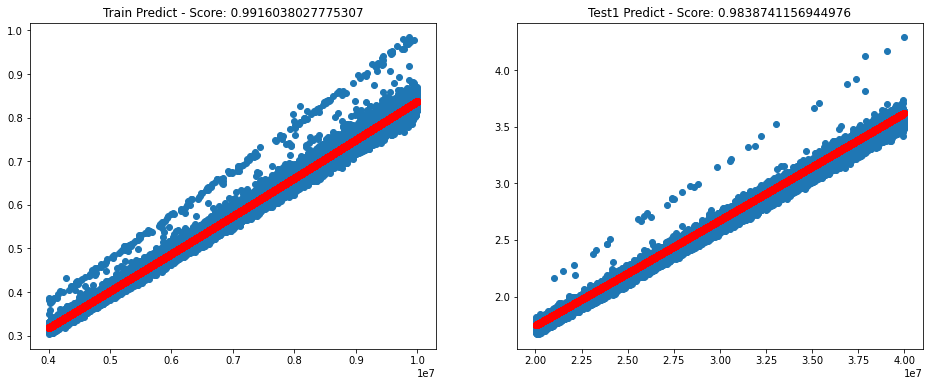

In [ ]:
visual_poly(lg, X_train, y_train, X_test1, y_test1, label='Test1')

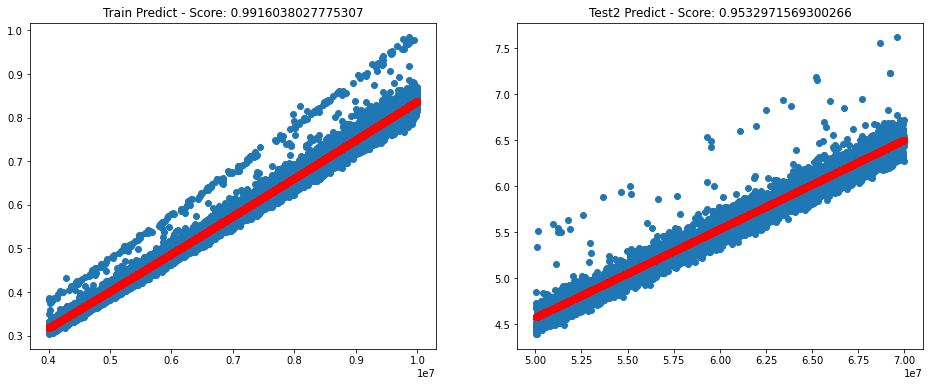

In [ ]:
visual_poly(lg, X_train, y_train, X_test2, y_test2, label='Test2')